In [9]:
from generate_SOS import project_to_linear_space, auxiliary, general_sos, make_proj_vector_space_SOS
from projections import * #All the algorithms we used.
from Experiments import Experiment_dimension_rank_beta, Experiment_dimension_rank
import sympy as sp
from SumOfSquares import SOSProblem, poly_opt_prob

# Example 4.1

In [3]:
# Defines symbolic variables and polynomial
x, y = sp.symbols('x y')
p = 1e-8*x**2 + 1e8*y**2 + 2*x*y
prob = SOSProblem()

# Adds Sum-of-Squares constaint and solves problem
const = prob.add_sos_constraint(p, [x, y])
prob.solve(solver='mosek', mosek_params={'MSK_DPAR_INTPNT_CO_TOL_REL_GAP': 1e-8,})

# Prints Sum-of-Squares decomposition
print(sum(const.get_sos_decomp()))

SolutionFailure: Code 3: Primal solution state claimed unknown but optimality is required (primals=True).

In [3]:
n, d = 2 , 2

basis1, basis2, d1, d2, indices_matrix, nb_parts = auxiliary(n, d)

proj_vector_space_V = make_proj_vector_space_SOS(indices_matrix, nb_parts)
dim = len(indices_matrix)

qty = 2
g2 = np.zeros(len(basis2))
g2[-1] =  1e8
g2[-3] = 1e-8
g2[-2] = 2
proj_0_on_V = project_to_linear_space(zeros((dim, dim)), g2, indices_matrix, nb_parts)

In [4]:
# Any projection method converges in one iteration.
ps, nlevs = HIPswitch(proj_0_on_V, proj_vector_space_V, proj_0_on_V, min_cos=0.99, maxiter=500, tol=1e-8)

Iteration 0
-0.0


# Example 4.2

In [5]:
# Defines symbolic variables and polynomial
x, y = sp.symbols('x y')
p = x**2 + y**8
prob = SOSProblem()

# Adds Sum-of-Squares constaint and solves problem
const = prob.add_sos_constraint(p, [x, y])
prob.solve(solver='mosek', mosek_params={'MSK_DPAR_INTPNT_CO_TOL_REL_GAP': 1e-38,})

# Prints Sum-of-Squares decomposition
print(sum(const.get_sos_decomp()))

4.0e-6*x**2*y**4 + 0.00048*x**2*y**2 + 1.0*x**2 + 1.0*y**8


# Example 4.3

In [6]:
# Defines symbolic variables and polynomial
x, y = sp.symbols('x y')
p = -1e-8*x**2 + y**4
prob = SOSProblem()

# Adds Sum-of-Squares constaint and solves problem
const = prob.add_sos_constraint(p, [x, y])
prob.solve(solver='mosek', mosek_params={'MSK_DPAR_INTPNT_CO_TOL_REL_GAP': 1e-8,})

# Prints Sum-of-Squares decomposition
print(sum(const.get_sos_decomp()))

0.0001*x**2*y**2 + 0.999*y**4 + 0.0001*y**2


# Example 4.6

In [7]:
n, d = 2 , 2

basis1, basis2, d1, d2, indices_matrix, nb_parts = auxiliary(n, d)

proj_vector_space_V = make_proj_vector_space_SOS(indices_matrix, nb_parts)
dim = len(indices_matrix)

qty = 2
g2 = np.zeros(len(basis2))
g2[-1] = 1
g2[-3] = 2
g2[-5] = 1
g2[0] = 1
g2[3] = 2
g2[5] = 2
proj_0_on_V = project_to_linear_space(zeros((dim, dim)), g2, indices_matrix, nb_parts)

In [8]:
#example
st = time.time()#7_30
ps, nlevs = HIPswitch(proj_0_on_V, proj_vector_space_V, proj_0_on_V, min_cos=0.99, maxiter=500, tol=1e-8)
cputime = time.time()-st
cputime

Iteration 0
-0.33333333333333315


0.0009555816650390625

In [9]:
ps[-1]

array([[1.        , 0.        , 0.        , 0.66666667, 0.        ,
        0.66666667],
       [0.        , 0.66666667, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.66666667, 0.        , 0.        ,
        0.        ],
       [0.66666667, 0.        , 0.        , 1.        , 0.        ,
        0.66666667],
       [0.        , 0.        , 0.        , 0.        , 0.66666667,
        0.        ],
       [0.66666667, 0.        , 0.        , 0.66666667, 0.        ,
        1.        ]])

In [5]:
import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np

# 🎨 Tol medium-contrast color palette
tolcolors_med_contrast = {
    'ly': '#EECC66',
    'lr': '#EE99AA',
    'lb': '#6699CC',
    'dy': '#997700',
    'dr': '#994455',
    'db': '#004488',
}
color_order = ['db', 'dy', 'lr', 'lb', 'ly', 'dr']

custom_cycler = (
    cycler(color=[tolcolors_med_contrast[c] for c in color_order])
)

plt.rc('axes', prop_cycle=custom_cycler)
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = 'dotted'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.titlesize'] = 16

In [11]:
%matplotlib inline

# Figure 3 in Example 4.4

In [10]:
# Loading the coefficients of the polynomial used for the figure.
# Initially generated via general_sos(n, d, qty, indices_matrix) below.
#
coeff = np.load('data_for_paper/plot_n3d4_coeff.npz')
coeff = coeff['coeff']

In [11]:
# Defining the necessary variables to project on the affine space associated to the polynomial
n, d = 3, 4

basis1, basis2, d1, d2, indices_matrix, nb_parts = auxiliary(n, d)

proj_vector_space_V = make_proj_vector_space_SOS(indices_matrix, nb_parts)
dim = len(indices_matrix)

# qty = 5
# g2 = general_sos(n, d, qty, indices_matrix)
g2 = coeff
proj_0_on_V = project_to_linear_space(zeros((dim, dim)), g2, indices_matrix, nb_parts)

# Initial point in the algorithms
p = np.eye(len(basis1)) * 0.1

In [12]:
# Using each algorithm on the polynomial
_, APnlev_ = AP(p, proj_vector_space_V, proj_0_on_V, maxiter=500)
_, Dykstranlev_ = Dykstra(p, proj_vector_space_V, proj_0_on_V, maxiter=500)
_, oneHIPnlev_ = oneHIP_AP(p, proj_vector_space_V, proj_0_on_V,AP_steps=0, maxiter=500)
_, oneHIP_APnlev_ = oneHIP_AP(p, proj_vector_space_V, proj_0_on_V, maxiter=500)
_, HIPswitchnlev_ = HIPswitch(p, proj_vector_space_V, proj_0_on_V, maxiter=500)
_, pureHIPnlev_ = pureHIP(p, proj_vector_space_V, proj_0_on_V, maxiter=500)

0
4.15167011057283
1
2.1650816016884344
2
1.3071477397897973
3
0.8956537361439944
4
0.6809599752442315
5
0.5563005727351951
6
0.4748555488011685
7
0.41622733882347696
8
0.3711990260059191
9
0.3351444498560866
10
0.30546134548551057
11
0.280499705948098
12
0.25921510755758315
13
0.24086035787197937
14
0.22487507569103454
15
0.21083217066554163
16
0.1984003746512807
17
0.18731879758648817
18
0.1773792962151518
19
0.16841392808063743
20
0.16028581853692975
21
0.1528823909303103
22
0.14611031804640306
23
0.1398916429866725
24
0.134160598271601
25
0.12886137922429364
26
0.12394644023871848
27
0.11937501417404411
28
0.11511193809004219
29
0.11112671723488167
30
0.10739277154808864
31
0.10388682387745592
32
0.1005883996431835
33
0.09747941501239923
34
0.09454383591429492
35
0.09176739412357429
36
0.08913734958497703
37
0.0866422904098649
38
0.08427196372534215
39
0.08201713192200621
40
0.07986944991846798
41
0.0778213599057975
42
0.0758660007037852
43
0.07399712939175626
44
0.0722090532997721

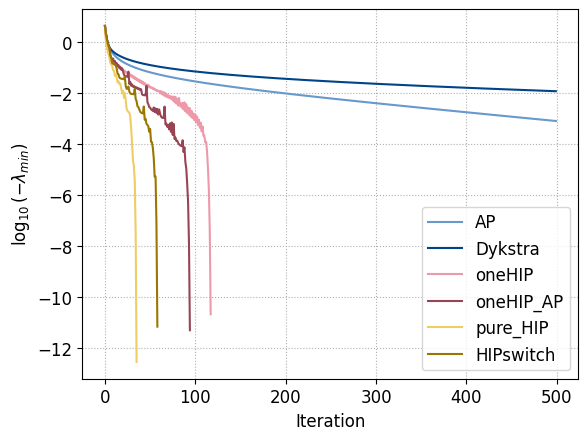

In [76]:
plt.plot(np.log10(APnlev_),label='AP', color=tolcolors_med_contrast['lb'])
plt.plot(np.log10(Dykstranlev_),label='Dykstra', color=tolcolors_med_contrast['db'])
plt.plot(np.log10(oneHIPnlev_),label='oneHIP', color=tolcolors_med_contrast['lr'])
plt.plot(np.log10(oneHIP_APnlev_),label='oneHIP_AP', color=tolcolors_med_contrast['dr'])
plt.plot(np.log10(pureHIPnlev_),label='pure_HIP', color=tolcolors_med_contrast['ly'])
plt.plot(np.log10(HIPswitchnlev_),label='HIPswitch', color=tolcolors_med_contrast['dy'])
plt.xlabel('Iteration')
plt.ylabel('$\log_{10}(-\lambda_{min})$')
plt.legend()
#plt.savefig('n3d4.png',dpi=200)

# The Figure 4 in Example 4.5

In [16]:
# Loading the coefficients of the polynomial used for the figure.
# Initially generated via general_sos(n, d, qty, indices_matrix) below.
#

coeff = np.load('data_for_paper/plot_n10d4_coeff.npz')
coeff = coeff['coeff']

In [17]:
# Defining the necessary variables to project on the affine space associated to the polynomial
n, d = 10, 4

basis1, basis2, d1, d2, indices_matrix, nb_parts = auxiliary(n, d)

proj_vector_space_V = make_proj_vector_space_SOS(indices_matrix, nb_parts)
dim = len(indices_matrix)

# qty = 20
# g2 = general_sos(n, d, qty, indices_matrix)
g2 = coeff
proj_0_on_V = project_to_linear_space(zeros((dim, dim)), g2, indices_matrix, nb_parts)

# Initial point in the algorithms
p = np.eye(len(basis1)) * 0.1

In [ ]:
# Using each algorithm on the polynomial
_, APnlev_ = AP(p, proj_vector_space_V, proj_0_on_V, maxiter=500)
_, Dykstranlev_ = Dykstra(p, proj_vector_space_V, proj_0_on_V, maxiter=500)
_, oneHIPnlev_ = oneHIP_AP(p, proj_vector_space_V, proj_0_on_V,AP_steps=0, maxiter=500)
_, oneHIP_APnlev_ = oneHIP_AP(p, proj_vector_space_V, proj_0_on_V, maxiter=500)
_, HIPswitchnlev_ = HIPswitch(p, proj_vector_space_V, proj_0_on_V, maxiter=500)
_, pureHIPnlev_ = pureHIP(p, proj_vector_space_V, proj_0_on_V, maxiter=500)

In [ ]:
plt.plot(np.log10(APnlev_),label='AP', color=tolcolors_med_contrast['lb'])
plt.plot(np.log10(Dykstranlev_),label='Dykstra', color=tolcolors_med_contrast['db'])
plt.plot(np.log10(oneHIPnlev_),label='oneHIP', color=tolcolors_med_contrast['lr'])
plt.plot(np.log10(oneHIP_APnlev_),label='oneHIP_AP', color=tolcolors_med_contrast['dr'])
plt.plot(np.log10(pureHIPnlev_),label='pure_HIP', color=tolcolors_med_contrast['ly'])
plt.plot(np.log10(HIPswitchnlev_),label='HIPswitch', color=tolcolors_med_contrast['dy'])
plt.xlabel('Iteration')
plt.ylabel('$\log_{10}(-\lambda_{min})$')
plt.legend()
#plt.savefig('n10d4.png',dpi=200)

# Figures 5-6

In [87]:
# Loading the coefficients of the polynomials used for the figure.
# Initially generated via general_sos(n, d, qty, indices_matrix) in the loop below.
#

coeff = np.load('data_for_paper/plot_n6d4_coeffs.npz', allow_pickle=True)
coeff = coeff['arr_0'].item()

# These files also contains the (- least eigenvalue) at each iteration of our simulations.
# The form is a dictionary whose key is the qty below, and items are lists of arrays, each 
# being the sequence of (-least eigenvalues) of one experiment.
#
# > summary_oneHIP = np.load('data_for_paper/plot_n6d4_oneHIP.npz',  allow_pickle=True)
# > summary_oneHIP_AP = np.load('data_for_paper/plot_n6d4_oneHIP_AP.npz',  allow_pickle=True)
#
# For example, the sequence of (-least eigenvalue) for the fourth repetition of experiment
# with qty=12 terms for oneHIP is
# > summary_oneHIP['arr_0'].item()[12][3]
#


In [81]:
# Defining the necessary variables to project on the affine space associated to the polynomial

n, d = 6, 4

basis1, basis2, d1, d2, indices_matrix, nb_parts = auxiliary(n, d)

proj_vector_space_V = make_proj_vector_space_SOS(indices_matrix, nb_parts)
dim = len(indices_matrix)

# Initial point
p = np.eye(len(basis1)) * 0.1

In [ ]:
# coeffs = {}
oneHIP_AP_nlevs = {}
oneHIP_nlevs = {}
for qty in [10, 12, 15, 20]:
    # coeffs[qty] = []
    oneHIP_nlevs[qty] = []
    oneHIP_AP_nlevs[qty] = []
    for i in range(10):
        g2 = coeffs[qty][i]
        # g2 = general_sos(n, d, qty, indices_matrix)
        # coeffs[qty].append(g2)
        proj_0_on_V = project_to_linear_space(zeros((dim, dim)), g2, indices_matrix, nb_parts)
        _, oneHIP_nlev_ = oneHIP_AP(p, proj_vector_space_V, proj_0_on_V, AP_steps=0, maxiter=1000)
        oneHIP_nlevs[qty].append(oneHIP_nlev_)
        _, oneHIP_AP_nlev_ = oneHIP_AP(p, proj_vector_space_V, proj_0_on_V, maxiter=1000)
        oneHIP_AP_nlevs[qty].append(oneHIP_AP_nlev_)

In [ ]:
# Number of iterations needed in each case
it12AP = array([len(x) for x in oneHIP_AP_nlevs[12]])
it12H = array([len(x) for x in oneHIP_nlevs[12]])
it15AP = array([len(x) for x in oneHIP_AP_nlevs[15]])
it15H = array([len(x) for x in oneHIP_nlevs[15]])
it20AP = array([len(x) for x in oneHIP_AP_nlevs[20]])
it20H = array([len(x) for x in oneHIP_nlevs[20]])

In [ ]:
plt.figure()
plt.scatter(it12H, it12H / it12AP, label = '12 terms')
plt.scatter(it15H, it15H / it15AP, label = '15 terms')
plt.scatter(it20H, it20H / it20AP, label = '20 terms')
plt.xlabel('Iterations(oneHIP)')
plt.ylabel(r'Ratio of iterations $\frac{\text{oneHIP}}{\text{oneHIP_AP}}$', size='large')
plt.legend()
# plt.savefig('Ratio_of_oneHIP_oneHIPAP.png',dpi = 200)

In [ ]:
color2 = '#0072B2'
color1 = '#E69F00'
fig, ax = plt.subplots()
x1, x2, y1, y2 = 10, 80, -1.6, 0  # subregion of the original image
axins = ax.inset_axes(
   [0.4, 0.65, 0.59, 0.34],
   xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])

for i in range(10):
    if i == 0:
        ax.plot(np.log10(oneHIP_nlevs[12][i]), color=color2, alpha=0.6,label='oneHIP')        
        ax.plot(np.log10(oneHIP_AP_nlevs[12][i]), color=color1, alpha=0.3,label='oneHIP_AP')
        axins.plot(np.log10(oneHIP_AP_nlevs[12][i]), color=color1, alpha=0.3)
        axins.plot(np.log10(oneHIP_nlevs[12][i]), color=color2, alpha=0.6)
    else:
        ax.plot(np.log10(oneHIP_AP_nlevs[12][i]), color=color1, alpha=0.3)
        ax.plot(np.log10(oneHIP_nlevs[12][i]), color=color2, alpha=0.6)
        axins.plot(np.log10(oneHIP_AP_nlevs[12][i]), color=color1, alpha=0.3)
        axins.plot(np.log10(oneHIP_nlevs[12][i]), color=color2, alpha=0.6)
# plt.title("Convergence behavior of pureHIP and HIPswitch for 4_10_7")
plt.xlabel('Iteration')
plt.ylabel('$\log_{10}(-\lambda_{min})$')
ax.indicate_inset_zoom(axins, edgecolor="black")

plt.legend(loc='lower right')
# plt.savefig('n6d4qty12_oneHIPAP_oneHIP.png',dpi = 200)

# Figure 7

In [92]:
# Loading the coefficients of the polynomials used for the figure.
# Initially generated via general_sos(n, d, qty, indices_matrix) in the loop below.
#
coeff = np.load('data_for_paper/plot_pureHIP_HIPswitch_10_4_20_coeff.npz')
coeff = coeff['list_coeff']


# These files also contains the (- least eigenvalue) at each iteration of our simulations.
# The form is a dictionary whose key is the qty below, and items are lists of arrays, each 
# being the sequence of (-least eigenvalues) of one experiment.
#
# > summary_pureHIP_HIPswitch = np.load('data_for_paper/plot_pureHIP_HIPswitch_10_4_20.npz')
#
# For example, the sequence of (-least eigenvalue) for the fourth repetition of the experiment
# pureHIP
# > summary_pureHIP_HIPswitch['list_pureHIP'][3]
#


In [82]:
# Defining the necessary variables to project on the affine space associated to the polynomial

n, d = 10, 4
# qty = 20

basis1, basis2, d1, d2, indices_matrix, nb_parts = auxiliary(n, d)

proj_vector_space_V = make_proj_vector_space_SOS(indices_matrix, nb_parts)
dim = len(indices_matrix)

# Initial point
p = np.eye(len(basis1)) * 0.1

In [ ]:
nlevpureHIP = []
nlevHIPswitch = []
# coeff = []
for i in range(10):
    g2 = coeff1[i]
    # g2 = general_sos(n, d, qty, indices_matrix)
    # coeff.append(g2)
    proj_0_on_V = project_to_linear_space(zeros((dim, dim)), g2, indices_matrix, nb_parts)
    _, pureHIPnlev_ = pureHIP(p, proj_vector_space_V, proj_0_on_V, maxiter=1000)
    nlevpureHIP.append(pureHIPnlev_)
    _, HIPswitchnlev_ = HIPswitch(p, proj_vector_space_V, proj_0_on_V, maxiter=1000)
    nlevHIPswitch.append(HIPswitchnlev_)

In [ ]:
plt.figure()
for i in range(10):
    if i == 0:
        plt.plot(np.log10(nlev_pureHIP[i]), color=tolcolors_med_contrast['db'], alpha=0.6,label='pureHIP')
        plt.plot(np.log10(nlev_HIPswitch[i]), color=tolcolors_med_contrast['lr'], alpha=0.6,label='HIPswitch')
    else:
        plt.plot(np.log10(nlev_pureHIP[i]), color=tolcolors_med_contrast['db'], alpha=0.6)
        plt.plot(np.log10(nlev_HIPswitch[i]), color=tolcolors_med_contrast['lr'], alpha=0.6)
# plt.title("Convergence behavior of pureHIP and HIPswitch for 4_10_7")
plt.xlabel('Iteration')
plt.ylabel('$\log_{10}(-\lambda_{min})$')
plt.legend()
#plt.show()
# plt.savefig('Com_pureHIP_HIPswitch10_4_20.png',dpi=200)

# Figure 8

In [18]:
# Loading the coefficients of the polynomials used for the figure.
# Initially generated via general_sos(n, d, qty, indices_matrix) in the loop below.
#
coeff = np.load('data_for_paper/plot_dimension_coeff.npz')
coeff

NpzFile 'data_for_paper/plot_dimension_coeff.npz' with keys: coeff222, coeff435, coeff6410, coeff10420

In [22]:
coeff222 = coeff['coeff222']
coeff435 = coeff['coeff435']
coeff6410 = coeff['coeff6410']
coeff10420 = coeff['coeff10420']
coeff_list = [coeff222,coeff435,coeff6410,coeff10420]

In [25]:
param_list = [(2, 2), (4, 3), (6, 4), (10, 4)]
HIPswitch_results = {}
i = 0
for n, d in param_list:
    # Defining the necessary variables to project on the affine space associated to the polynomial
    basis1, basis2, d1, d2, indices_matrix, nb_parts = auxiliary(n, d)
    proj_vector_space_V = make_proj_vector_space_SOS(indices_matrix, nb_parts)
    dim = len(indices_matrix)
    g2 = coeff_list[i]
    proj_0_on_V = project_to_linear_space(np.zeros((dim, dim)), g2, indices_matrix, nb_parts)
    # Initial point
    p = np.eye(len(basis1)) * 0.1
    _, HIPswitch_nlev_ = HIPswitch(p, proj_vector_space_V, proj_0_on_V, maxiter=500)
    HIPswitch_results[f"HIPswitch{n}{d}nlev_"] = HIPswitch_nlev_
    i +=1

Iteration 0
0.876701050745878
AP mode
cos: 0.0
Iteration 0
3.734606225807682
AP mode
cos: 0.0
Iteration 0
12.217563323494353
AP mode
cos: 0.0
Iteration 0
30.015137111966936
AP mode
cos: 0.0


In [ ]:
plt.plot(np.log10(HIPswitch_results['HIPswitch22nlev_']),label='2 dim 2deg 2terms')
plt.plot(np.log10(HIPswitch_results['HIPswitch43nlev_']),label='4 dim 3deg 5terms')
plt.plot(np.log10(HIPswitch_results['HIPswitch64nlev_']),label='6 dim 4deg 10terms')
plt.plot(np.log10(HIPswitch_results['HIPswitch104nlev_']),label='10 dim 4deg 20terms')
plt.xlabel('Iteration')
plt.ylabel('$\log_{10}(-\lambda_{min})$')
plt.legend()
# plt.savefig('dimension.png',dpi=200)

# Figure 9

In [26]:
# Loading the coefficients of the polynomials used for the figure.
# Initially generated via general_sos(n, d, qty, indices_matrix) in the loop below.
#
coeff = np.load('data_for_paper/plot_rank_coeff.npz')
coeff

NpzFile 'data_for_paper/plot_rank_coeff.npz' with keys: coeff341, coeff343, coeff347

In [29]:
coeff341 = coeff['coeff341']
coeff343 = coeff['coeff343']
coeff347 = coeff['coeff347']
coeff_list = [coeff341,coeff343,coeff347]

In [30]:
HIPswitch_results = {}
n = 3
d = 4
for i in range(3):
    # Defining the necessary variables to project on the affine space associated to the polynomial
    basis1, basis2, d1, d2, indices_matrix, nb_parts = auxiliary(n, d)
    proj_vector_space_V = make_proj_vector_space_SOS(indices_matrix, nb_parts)
    dim = len(indices_matrix)
    g2 = coeff_list[i]
    proj_0_on_V = project_to_linear_space(np.zeros((dim, dim)), g2, indices_matrix, nb_parts)
    # Initial point
    p = np.eye(len(basis1)) * 0.1
    _, HIPswitch_nlev_ = HIPswitch(p, proj_vector_space_V, proj_0_on_V, maxiter=500)
    HIPswitch_results[f"HIPswitch{i}"] = HIPswitch_nlev_
    i +=1

Iteration 0
2.182687460262925
AP mode
cos: 0.0
Iteration 0
2.9500204153226632
AP mode
cos: 0.0
Iteration 0
4.314062907171762
AP mode
cos: 0.0


In [ ]:
plt.plot(np.log10(HIPswitch_results['HIPswitch0']),label='3 dim 4deg 1terms')
plt.plot(np.log10(HIPswitch_results['HIPswitch1']),label='3 dim 4deg 3terms')
plt.plot(np.log10(HIPswitch_results['HIPswitch2']),label='3 dim 4deg 7terms')
plt.xlabel('Iteration')
plt.ylabel('$\log_{10}(-\lambda_{min})$')
plt.legend()
# plt.savefig('rank.png',dpi=200)

# Figure 10

In [32]:
# Loading the coefficients of the polynomial used for the figure.
# Initially generated via general_sos(n, d, qty, indices_matrix) below.
#
coeff = np.load('data_for_paper/plot_APTRF_coeff.npz')
coeff = coeff['coeff']

In [33]:
n, d = 3, 4

basis1, basis2, d1, d2, indices_matrix, nb_parts = auxiliary(n, d)

proj_vector_space_V = make_proj_vector_space_SOS(indices_matrix, nb_parts)
dim = len(indices_matrix)
# qty = 1
# g2 = general_sos(n, d, qty, indices_matrix)
g2 = coeff
proj_0_on_V = project_to_linear_space(zeros((dim, dim)), g2, indices_matrix, nb_parts)
# Initial point
p = np.eye(len(basis1)) * 0.1

In [ ]:
# Using each algorithm on the polynomial
_, HIPswitchnlev_ = HIPswitch(p, proj_vector_space_V, proj_0_on_V, maxiter=500)
_, APTRnlev_ = APTR(p, proj_vector_space_V, proj_0_on_V, maxiter=500)
_, APFRnlev_ = APFR(p, proj_vector_space_V, proj_0_on_V, maxiter=500)
_, extraAPTRnlev_ = extraAPTR(p, proj_vector_space_V, proj_0_on_V, maxiter=500)
_, extraAPFRnlev_ = extraAPFR(p, proj_vector_space_V, proj_0_on_V, maxiter=500)

In [ ]:
plt.plot(np.log10(HIPswitchnlev_),label='HIPswitch', color=tolcolors_med_contrast['lr'])
plt.plot(np.log10(APTRnlev_),label='APTR',linestyle='-', color="#080")
plt.plot(np.log10(APFRnlev_),label='APFR',linestyle='-.', color=tolcolors_med_contrast['ly'])
plt.plot(np.log10(extraAPTRnlev_),label='extraAPTR',linestyle='-', color='#000000')
plt.plot(np.log10(extraAPFRnlev_),label='extraAPFR',linestyle='-.', color='#8FF')
plt.xlabel('Iteration')
plt.ylabel('$\log_{10}(-\lambda_{min})$')
plt.legend()
# plt.savefig('APTFR.png',dpi=200)

# TABLES
You can either:  
- **Run new tests** using the function `Experiment_dimension_rank`, or  
- **Reproduce the results** by loading the same polynomial coefficients as in our paper using `Experiment_dimension_rank_beta`.

After the creation of data for each table, we give a demo of retrieving the data from the created hdf5 file.

# Tables 1–3
- The information in Tables 1–3 is stored in different files, but all sharing the same polynomial coefficients under the same settings.

In [79]:
import itertools
import pandas as pd
import contextlib
import io

In [49]:
creat_filename = "table1_3.h5"
poly_set = [(2,2,2), (4,3,5), (6,4,10), (6,4,50), (10,4,20)]
projection = ["HIPswitch", "MOSEK"]

In [47]:
# Runs the experiment
with contextlib.redirect_stdout(io.StringIO()):
    Experiment_dimension_rank(creat_filename, poly_set, projection, Ex_times=100, maxiter=1000)

# Tables 4-7

In [54]:
creat_filename = "table4_7.h5"
poly_set = [(3,4,1),(3,4,2),(3,4,3),(3,4,4),(3,4,5),(3,4,6)]
projection = ["AP","Dykstra","oneHIP","oneHIP_AP","pureHIP","HIPswitch", "APFR","APTR","extraAPFR","extraAPTR", "MOSEK"]

In [52]:
# Runs the experiment
with contextlib.redirect_stdout(io.StringIO()):
    Experiment_dimension_rank(creat_filename, poly_set,projection, Ex_times=100, maxiter=5000)

#### A demo for reproducing the results in Tables 4–7.

In [78]:
creat_filename = "table4_7.h5"
file_poly = "data_for_paper/Tables4_7_all.h5" #Loading the coefficient of SOS polynomials
poly_set = [(3,4,1),(3,4,2),(3,4,3),(3,4,4),(3,4,5),(3,4,6)]
projection = ["AP","Dykstra","oneHIP","oneHIP_AP","pureHIP","HIPswitch", "APFR","APTR","extraAPFR","extraAPTR", "MOSEK"]

In [63]:
with contextlib.redirect_stdout(io.StringIO()):
    Experiment_dimension_rank_beta(creat_filename,file_poly,poly_set,projection,Ex_times=100, maxiter=5000)

# Tables 8-10

In [55]:
creat_filename = "table8_10.h5"
poly_set = [(10,4,1), (10,4,2), (10,4,3)]
projection = ["APFR", "APTR", "extraAPFR", "extraAPTR"]

In [ ]:
# Runs the experiment
with contextlib.redirect_stdout(io.StringIO()):
    Experiment_dimension_rank(creat_filename,poly_set,projection,Ex_times=10, maxiter=1000)

# Tables 11-13

In [56]:
creat_filename = "table11_13.h5"
poly_set = [(4,10,1), (4,10,2), (4,10,3)]
projection = ["APFR", "APTR", "extraAPFR", "extraAPTR"]

In [ ]:
# Runs the experiment
with contextlib.redirect_stdout(io.StringIO()):
    Experiment_dimension_rank(creat_filename, poly_set, projection, Ex_times=10, maxiter=1000)

# Obtain the data from HDF5

In [58]:
import tables as tb

In [60]:
#Loading the h5 file
filename = 'data_for_paper/20251022_effect_of_lowrank_n10d4_allcases.h5'
h5file = tb.open_file(filename, mode="r")
print(h5file)

data_for_paper/20251022_effect_of_lowrank_n10d4_allcases.h5 (File) ''
Last modif.: '2025-10-22T05:12:22+00:00'
Object Tree: 
/ (RootGroup) ''
/poly_10_4_1 (Group) 'Polynomial (10, 4, 1)'
/poly_10_4_1/APFR_coeff_SOS (VLArray(10,)) ''
/poly_10_4_1/APFR_list_data (EArray(10, 1001, 1001)) ''
/poly_10_4_1/APFR_list_neg_least_ev (VLArray(10,)) ''
/poly_10_4_1/APFR_table_results (Table(10,)) 'APFR table result'
/poly_10_4_1/APTR_coeff_SOS (VLArray(10,)) ''
/poly_10_4_1/APTR_list_data (EArray(10, 1001, 1001)) ''
/poly_10_4_1/APTR_list_neg_least_ev (VLArray(10,)) ''
/poly_10_4_1/APTR_table_results (Table(10,)) 'APTR table result'
/poly_10_4_1/lazyAPFR_coeff_SOS (VLArray(10,)) ''
/poly_10_4_1/lazyAPFR_list_data (EArray(10, 1001, 1001)) ''
/poly_10_4_1/lazyAPFR_list_neg_least_ev (VLArray(10,)) ''
/poly_10_4_1/lazyAPFR_table_results (Table(10,)) 'lazyAPFR table result'
/poly_10_4_1/lazyAPTR_coeff_SOS (VLArray(10,)) ''
/poly_10_4_1/lazyAPTR_list_data (EArray(10, 1001, 1001)) ''
/poly_10_4_1/lazyAPT

In [61]:
s = 3#The number of settings
al = 4#The number of algorithms
suc_rate_conv = np.zeros(s*al).reshape(s,al)
ave_time = np.zeros(s*al).reshape(s,al)
std_time = np.zeros(s*al).reshape(s,al)
med_time = np.zeros(s*al).reshape(s,al)

ave_iteration = np.zeros(s*al).reshape(s,al)
std_iteration = np.zeros(s*al).reshape(s,al)
med_iteration = np.zeros(s*al).reshape(s,al)
row_names = []
col_names = []
for i, group in enumerate(itertools.islice(h5file.walk_groups("/"), 1, None), start=1):
    row_names.append(group._v_pathname)
    i -= 1
    j = 0
    for node in group:
        if node._v_name.split("_")[-1] == "results":
            suc_rate_conv[i,j] = node.col("is_success").sum()/100
            if -1 in node.col("is_success"):
                print(node)
            ave_iteration[i,j] = node.col("End_iterater")[node.col("is_success")].sum()/node.col("is_success").sum()
            ave_time[i,j] = node.col("CPU_time")[node.col("is_success")].sum()/node.col("is_success").sum()
            std_time[i,j] = np.std(node.col("CPU_time")[node.col("is_success")], ddof=1)
            med_time[i,j] = np.median(node.col("CPU_time")[node.col("is_success")])
            med_iteration[i,j] = np.median(node.col("End_iterater")[node.col("is_success")])            
            std_iteration[i,j] = np.std(node.col("End_iterater")[node.col("is_success")], ddof=1)
            j += 1
        if i==0 and node._v_name.split("_")[-1] == "results":
            col_names.append(node._v_name.split("_")[0])
df_suc_rate_conv = pd.DataFrame(suc_rate_conv, index=row_names, columns=col_names)
df_ave_time = pd.DataFrame(ave_time, index=row_names, columns=col_names)
df_std_time = pd.DataFrame(std_time, index=row_names, columns=col_names)
df_ave_iteration = pd.DataFrame(ave_iteration, index=row_names, columns=col_names)
df_std_iteration = pd.DataFrame(std_iteration, index=row_names, columns=col_names)
df_med_time = pd.DataFrame(med_time, index=row_names, columns=col_names)
df_med_iteration = pd.DataFrame(med_iteration, index=row_names, columns=col_names)